In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
X_train, X_test = [],[]
Y_train, Y_test = [],[]
for i in range(1,41):
    for j in range(1,10):
        img = cv2.imread('data/{}_{}.png'.format(i,j),cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        Y_train.append(i)
    img = cv2.imread('data/{}_10.png'.format(i),cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


In [6]:
x = X_train.reshape(len(Y_train),-1)
x.shape

(360, 2576)

## 1. mean face & first four eigenfaces

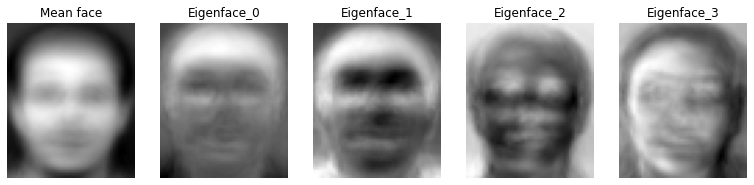

In [7]:
pca = PCA()
pca.fit(X_train.reshape(len(Y_train),-1))
plt.figure(figsize=(16,12))
plt.subplot(1,6,1)
plt.axis('off')
plt.title('Mean face')
plt.imshow(pca.mean_.reshape(X_train[0].shape),cmap='gray')
for i in range(4):
    plt.subplot(1,6,i+2)
    plt.axis('off')
    plt.title('Eigenface_{}'.format(i))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape),cmap='gray')

plt.show()

In [8]:
img = cv2.imread('data/2_1.png',cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a = pca.transform(img)
a.shape

(1, 360)

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

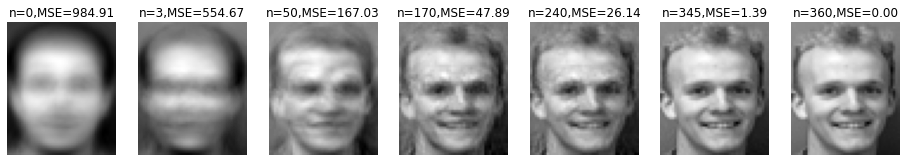

In [9]:
img = cv2.imread('data/5_3.png',cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a = pca.transform(img)
plt.figure(figsize=(16,12))
n_components = [0,3,50,170,240,345,360]
for i,n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face = face + a[0][j]*pca.components_[j]
    face = face + pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1,7,i+1)
    plt.axis('off')
    plt.title('n={},MSE={:.2f}'.format(n,MSE))
    plt.imshow(face.reshape(X_train[0].shape),cmap='gray')


## 4. cross-validation results

In [10]:
reduced_X_train = pca.transform(X_train.reshape(len(Y_train),-1))
K = [1,3,5]
N = [3,50,170]
random = np.random.permutation(len(Y_train))
reduced_X_train = reduced_X_train[random]
Y_train_random = Y_train[random]
for k in K:
    print('k={}'.format(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print('   n={}'.format(n),end=' ')
        score = cross_val_score(knn,reduced_X_train[:,:n],Y_train_random, cv=3)
        print('score={}'.format(score.mean()))


k=1
   n=3 score=0.7250000000000001
   n=50 score=0.9777777777777779
   n=170 score=0.9694444444444444
k=3
   n=3 score=0.6416666666666666
   n=50 score=0.9333333333333332
   n=170 score=0.9249999999999999
k=5
   n=3 score=0.5805555555555556
   n=50 score=0.8861111111111111
   n=170 score=0.8666666666666667


## 5. recognition rate of the testing set

In [12]:
k=1
n=40
reduced_X_test = pca.transform(X_test.reshape(len(Y_test),-1))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:,:n],Y_train_random)
print('accuracy={}'.format(knn.score(reduced_X_test[:,:n],Y_test)))

accuracy=0.925


In [13]:
Y_train_random.shape
reduced_X_train.shape

(360, 360)

<function matplotlib.pyplot.show(close=None, block=None)>

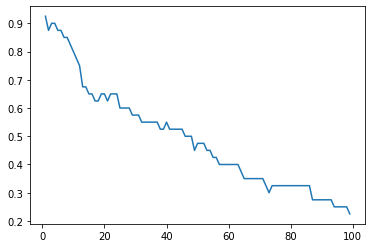

In [14]:
accuracy = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(reduced_X_train[:,:n],Y_train_random)
    y_predict = knn.predict(reduced_X_test[:,:n])
    accuracy.append(metrics.accuracy_score(Y_test,y_predict))
k_range = range(1,100)
plt.plot(k_range,accuracy)
plt.show

In [16]:
reduced_X_test.shape

(40, 360)